In [6]:
pip install numpy pandas scikit-learn matplotlib seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
Customer Segmentation Using KMeans Clustering

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load customer data (replace 'customers.csv' with your file)
df = pd.read_csv('customers.csv')

# Select features for segmentation (edit columns as needed)
features = df[['Age', 'Annual_Income', 'Spending_Score']]

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine optimal clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method: Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Choose optimal number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df['Segment'] = kmeans.fit_predict(scaled_features)

# Visualize customer segments
plt.figure(figsize=(8, 6))
for segment in df['Segment'].unique():
    plt.scatter(df[df['Segment'] == segment]['Annual_Income'],
                df[df['Segment'] == segment]['Spending_Score'], label=f'Segment {segment}')

plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

# Save segmented data to a new CSV file
df.to_csv('segmented_customers.csv', index=False)


SyntaxError: invalid syntax (3359116059.py, line 25)

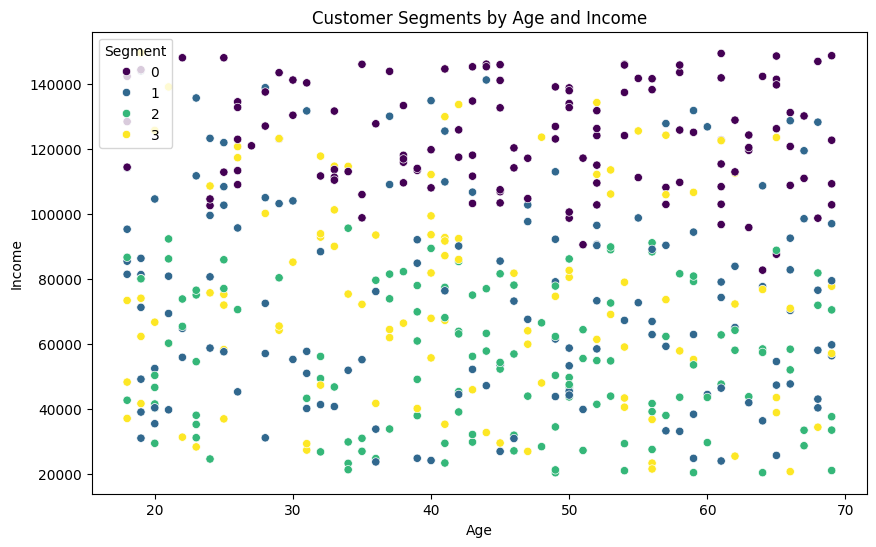

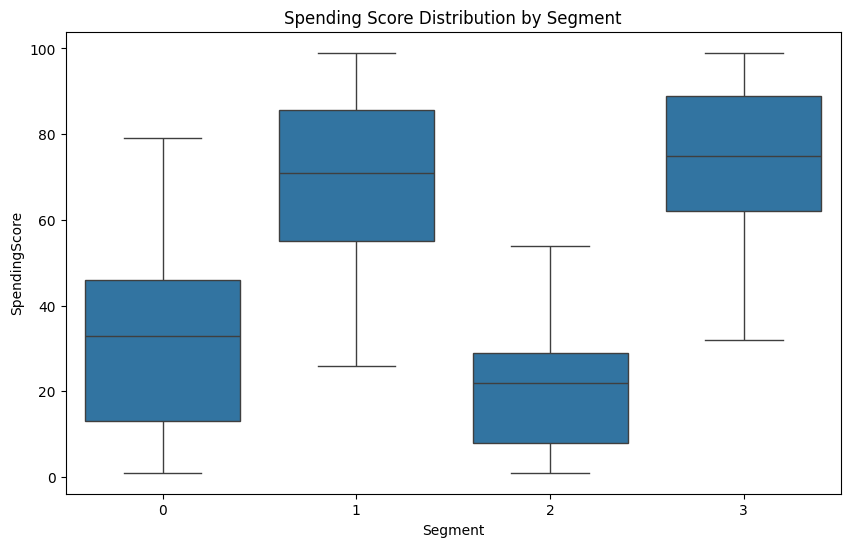

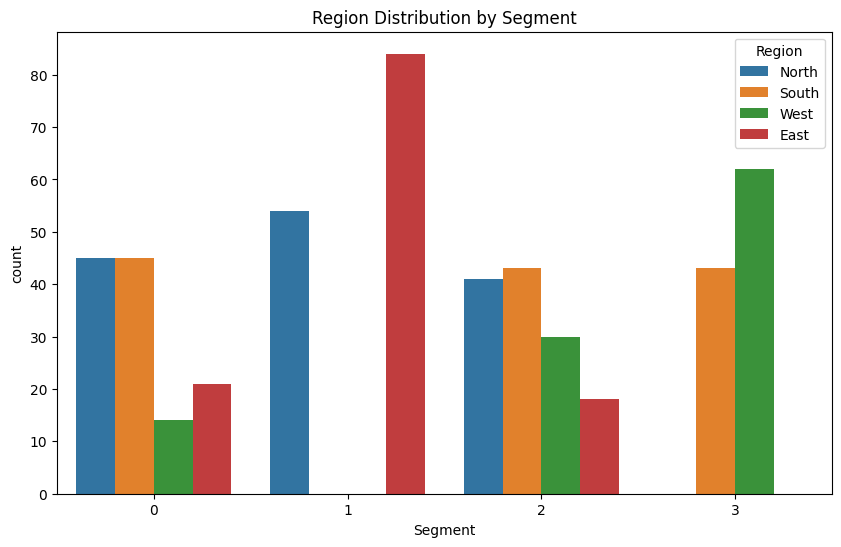

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate Synthetic Dataset
num_customers = 500
data = {
    'Age': np.random.randint(18, 70, num_customers),
    'Income': np.random.randint(20000, 150000, num_customers),
    'SpendingScore': np.random.randint(1, 100, num_customers),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], num_customers)
}
df = pd.DataFrame(data)

# Encode categorical data
df['RegionCode'] = df['Region'].astype('category').cat.codes

# Step 2: Standardize the data
features = ['Age', 'Income', 'SpendingScore', 'RegionCode']
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Step 3: Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(X)

# Step 4: Visualize Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', hue='Segment', data=df, palette='viridis')
plt.title('Customer Segments by Age and Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment', y='SpendingScore', data=df)
plt.title('Spending Score Distribution by Segment')
plt.show()

# Bar chart for region distribution by segment
plt.figure(figsize=(10, 6))
sns.countplot(x='Segment', hue='Region', data=df)
plt.title('Region Distribution by Segment')
plt.show()